In [1]:
#import needed packages
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from datetime import datetime as dt

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  

import sklearn
from sklearn.feature_selection import VarianceThreshold
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import cluster
from sklearn.cluster import KMeans, MiniBatchKMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm

# Libraries needed for hierarchical clustering.
from scipy import cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#set directory
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
data_dir= str(main_dir)+'\Data'

os.chdir(data_dir)

In [2]:
legos= pd.read_csv('lego_sets.csv')
print(legos.shape)
legos.head()

(12261, 14)


,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [3]:
legos.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,1.226100e+04,10641.000000,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,5.983675e+04,4.514134,4.228960
std,91.980429,36.368984,825.364580,0.652051,1.638115e+05,0.518865,0.660282
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.800000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,2.103400e+04,4.300000,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.206900e+04,4.700000,4.300000
75%,70.192200,13.000000,544.000000,4.800000,7.092200e+04,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000


In [4]:
legos[legos.filter(like='review_difficulty').isnull().any(1)]

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
22,10+,9.9900,1.0,136.0,NaN,Master the skills of a green-skinned assassin ...,41607.0,This Gamora LEGO® BrickHeadz construction char...,NaN,Gamora,5.0,BrickHeadz,NaN,US
32,10+,19.9900,NaN,209.0,NaN,Join the Justice League™ with LEGO® BrickHeadz...,41610.0,These LEGO® BrickHeadz™ 41610 Tactical Batman™...,NaN,Tactical Batman™ & Superman™,NaN,BrickHeadz,NaN,US
48,5-12,49.9900,NaN,387.0,NaN,Keep the crooks from escaping with the gold bars!,60175.0,Pick up your badge and join the LEGO® City Mou...,NaN,Mountain River Heist,NaN,City,NaN,US
55,7-12,99.9900,1.0,883.0,5.0,Head to the LEGO® City mine and dig up some gold!,60188.0,Grab your hard hat and head out to the LEGO® C...,NaN,Mining Experts Site,5.0,City,5.0,US
69,5-12,39.9900,NaN,297.0,NaN,Race after the crook and avoid the mountain ro...,60172.0,Pick up your badge and join the LEGO® City Mou...,NaN,Dirt Road Pursuit,NaN,City,NaN,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12136,8-14,36.5878,NaN,104.0,NaN,Own a true Sith Lord with Darth Maul!,75537.0,Bolster your LEGO® Star Wars collection with t...,NaN,Darth Maul™,NaN,Star Wars™,NaN,PT
12137,8-14,36.5878,NaN,101.0,NaN,Battle the bad guys with Han Solo!,75535.0,Play out exciting adventures with this highly ...,NaN,Han Solo™,NaN,Star Wars™,NaN,PT
12196,14+,243.9878,NaN,1967.0,NaN,Collect the ultimate long-range Rebel starfigh...,75181.0,Own part of Star Wars history with the Y-Wing ...,NaN,Y-Wing Starfighter™,NaN,Star Wars™,NaN,PT
12214,7-14,24.3878,1.0,135.0,5.0,Get ready for high-speed action and impacts wi...,42072.0,Experience the amazing power and acceleration ...,NaN,WHACK!,5.0,Technic,5.0,PT


In [5]:
print(legos.isna().sum())
legos.shape

legos= legos[legos['review_difficulty'].notna()]
print(legos.shape)
#legos.isna().sum()
legos= legos[legos['val_star_rating'].notna()]

legos= legos.dropna(axis=1, inplace= False)
legos.shape
#legos.isna().sum()

ages                    0
list_price              0
num_reviews          1620
piece_count             0
play_star_rating     1775
prod_desc             377
prod_id                 0
prod_long_desc          0
review_difficulty    2055
set_name                0
star_rating          1620
theme_name              3
val_star_rating      1795
country                 0
dtype: int64
(10206, 14)


(10165, 12)

In [6]:
print(legos.isna().sum())

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
prod_id              0
prod_long_desc       0
review_difficulty    0
set_name             0
star_rating          0
val_star_rating      0
country              0
dtype: int64


In [7]:
legos.dtypes

ages                  object
list_price           float64
num_reviews          float64
piece_count          float64
play_star_rating     float64
prod_id              float64
prod_long_desc        object
review_difficulty     object
set_name              object
star_rating          float64
val_star_rating      float64
country               object
dtype: object

In [8]:
legos['ages'].unique()

array(['6-12', '12+', '7-12', '10+', '8-12', '5-12', '4-99', '4+', '9-12',
       '16+', '14+', '9-14', '7-14', '8-14', '4-7', '6+', '2-5', '1½-5',
       '1½-3', '9+', '5-8', '10-21', '8+', '6-14', '5+', '10-16', '10-14',
       '11-16', '12-16', '9-16', '7+'], dtype=object)

In [9]:
legos['min_age']= legos['ages']

min_age= {'6-12':6, '12+':12, '7-12':7, '10+':10, '8-12':8, '5-12':5, '4-99':4, '4+':4, '9-12':9,
       '16+':16, '14+':14, '9-14':9, '7-14':7, '8-14':8, '4-7':4, '6+':6, '2-5':2, '1½-5':1.5,
       '1½-3':1.5, '9+':9, '5-8':5, '10-21':10, '8+':8, '6-14':6, '5+':5, '10-16':10, '10-14':10,
       '11-16':11, '12-16':12, '9-16':9, '7+':7}

legos= legos.replace({'min_age':min_age})
legos.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,val_star_rating,country,min_age
0,6-12,29.99,2.0,277.0,4.0,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,4.0,US,6.0
1,6-12,19.99,2.0,168.0,4.0,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,4.0,US,6.0
2,6-12,12.99,11.0,74.0,4.3,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,4.1,US,6.0
3,12+,99.99,23.0,1032.0,3.6,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,4.3,US,12.0
4,12+,79.99,14.0,744.0,3.2,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,4.1,US,12.0


In [10]:
legos['prod_id'].nunique()

634

In [11]:
legos['country'].value_counts()

US    691
CA    689
NL    478
AT    477
GB    476
DN    475
CH    474
IE    473
AU    472
BE    470
FR    468
NZ    463
IT    454
LU    453
NO    453
FI    453
ES    453
DE    453
CZ    453
PT    451
PL    436
Name: country, dtype: int64

In [12]:
legos['country'].unique()

array(['US', 'AU', 'AT', 'BE', 'CA', 'CH', 'CZ', 'DE', 'DN', 'ES', 'FI',
       'FR', 'GB', 'IE', 'IT', 'LU', 'NO', 'NL', 'NZ', 'PL', 'PT'],
      dtype=object)

In [13]:
legos['country_num']= legos['country']

country_num= {'US':1, 'AU':2, 'AT':3, 'BE':4, 'CA':5, 'CH':6, 'CZ':7, 'DE':8, 'DN':9, 'ES':10, 'FI':11,
       'FR':12, 'GB':13, 'IE':14, 'IT':15, 'LU':16, 'NO':17, 'NL':18, 'NZ':19, 'PL':20, 'PT':21}

legos= legos.replace({'country_num':country_num})
legos.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,val_star_rating,country,min_age,country_num
0,6-12,29.99,2.0,277.0,4.0,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,4.0,US,6.0,1
1,6-12,19.99,2.0,168.0,4.0,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,4.0,US,6.0,1
2,6-12,12.99,11.0,74.0,4.3,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,4.1,US,6.0,1
3,12+,99.99,23.0,1032.0,3.6,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,4.3,US,12.0,1
4,12+,79.99,14.0,744.0,3.2,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,4.1,US,12.0,1


In [14]:
fig= px.scatter(legos, x='list_price', y='piece_count', color= 'review_difficulty',
           labels= {'piece_count':'Number of pieces', 
                    'list_price':'Price in USD'}, title='Average Number of pieces and Set Price in USD by Difficulty Level',
               width=800, height=500)
fig.update_traces(marker={'size': 10})
fig.show()

<Figure size 1440x1080 with 0 Axes>

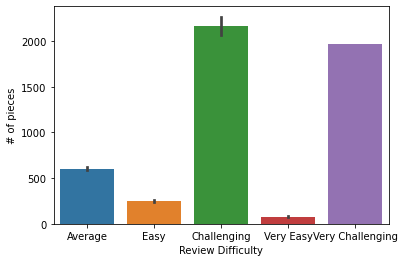

<Figure size 1440x1080 with 0 Axes>

In [15]:
sns.barplot(x=legos['review_difficulty'], y=legos['piece_count'])
plt.ylabel('# of pieces')
plt.xlabel('Review Difficulty')
plt.title('')
plt.figure(figsize=(20,15))

In [16]:
legos['review_difficulty'].unique()

array(['Average', 'Easy', 'Challenging', 'Very Easy', 'Very Challenging'],
      dtype=object)

In [17]:
review= {'Very Easy':1, 'Easy':2, 'Average':3, 'Challenging':4, 'Very Challenging':5}

legos= legos.replace({'review_difficulty':review})
legos.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,val_star_rating,country,min_age,country_num
0,6-12,29.99,2.0,277.0,4.0,75823.0,Use the staircase catapult to launch Red into ...,3,Bird Island Egg Heist,4.5,4.0,US,6.0,1
1,6-12,19.99,2.0,168.0,4.0,75822.0,Pilot Pig has taken off from Bird Island with ...,2,Piggy Plane Attack,5.0,4.0,US,6.0,1
2,6-12,12.99,11.0,74.0,4.3,75821.0,Pitch speedy bird Chuck against the Piggy Car....,2,Piggy Car Escape,4.3,4.1,US,6.0,1
3,12+,99.99,23.0,1032.0,3.6,21030.0,Discover the architectural secrets of the icon...,3,United States Capitol Building,4.6,4.3,US,12.0,1
4,12+,79.99,14.0,744.0,3.2,21035.0,Discover the architectural secrets of Frank Ll...,4,Solomon R. Guggenheim Museum®,4.6,4.1,US,12.0,1


In [18]:
legos.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,review_difficulty,star_rating,val_star_rating,min_age,country_num
count,10165.000000,10165.000000,10165.000000,10165.000000,1.016500e+04,10165.000000,10165.000000,10165.000000,10165.000000,10165.000000
mean,71.430894,17.552681,561.123955,4.328578,6.566977e+04,2.468864,4.504466,4.224476,7.483965,10.584850
std,99.054339,37.051847,885.118073,0.650290,1.786364e+05,0.828304,0.521850,0.661356,2.980429,6.150305
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.000000,1.800000,1.000000,1.500000,1.000000
25%,20.986000,3.000000,116.000000,4.000000,3.106800e+04,2.000000,4.300000,4.000000,6.000000,5.000000
50%,37.807800,6.000000,257.000000,4.500000,6.011900e+04,2.000000,4.600000,4.300000,7.000000,10.000000
75%,79.990000,14.000000,603.000000,4.800000,7.124500e+04,3.000000,4.900000,4.700000,9.000000,16.000000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000,5.000000,16.000000,21.000000


Text(0.5, 1.0, 'Review Difficulty and Number of Pieces')

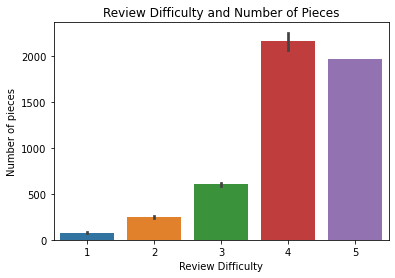

In [19]:
sns.barplot(x=legos['review_difficulty'], y=legos['piece_count'])
plt.ylabel('Number of pieces')
plt.xlabel('Review Difficulty')
plt.title('Review Difficulty and Number of Pieces')

Text(0.5, 1.0, 'Review Difficulty and Number of Reviews')

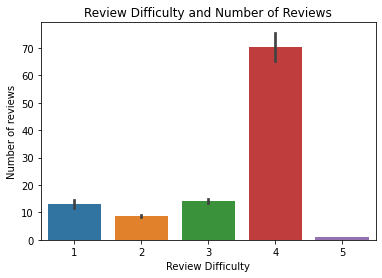

In [20]:
sns.barplot(x=legos['review_difficulty'], y=legos['num_reviews'])
plt.ylabel('Number of reviews')
plt.xlabel('Review Difficulty')
plt.title('Review Difficulty and Number of Reviews')

Text(0.5, 1.0, 'Review Difficulty and Star Rating')

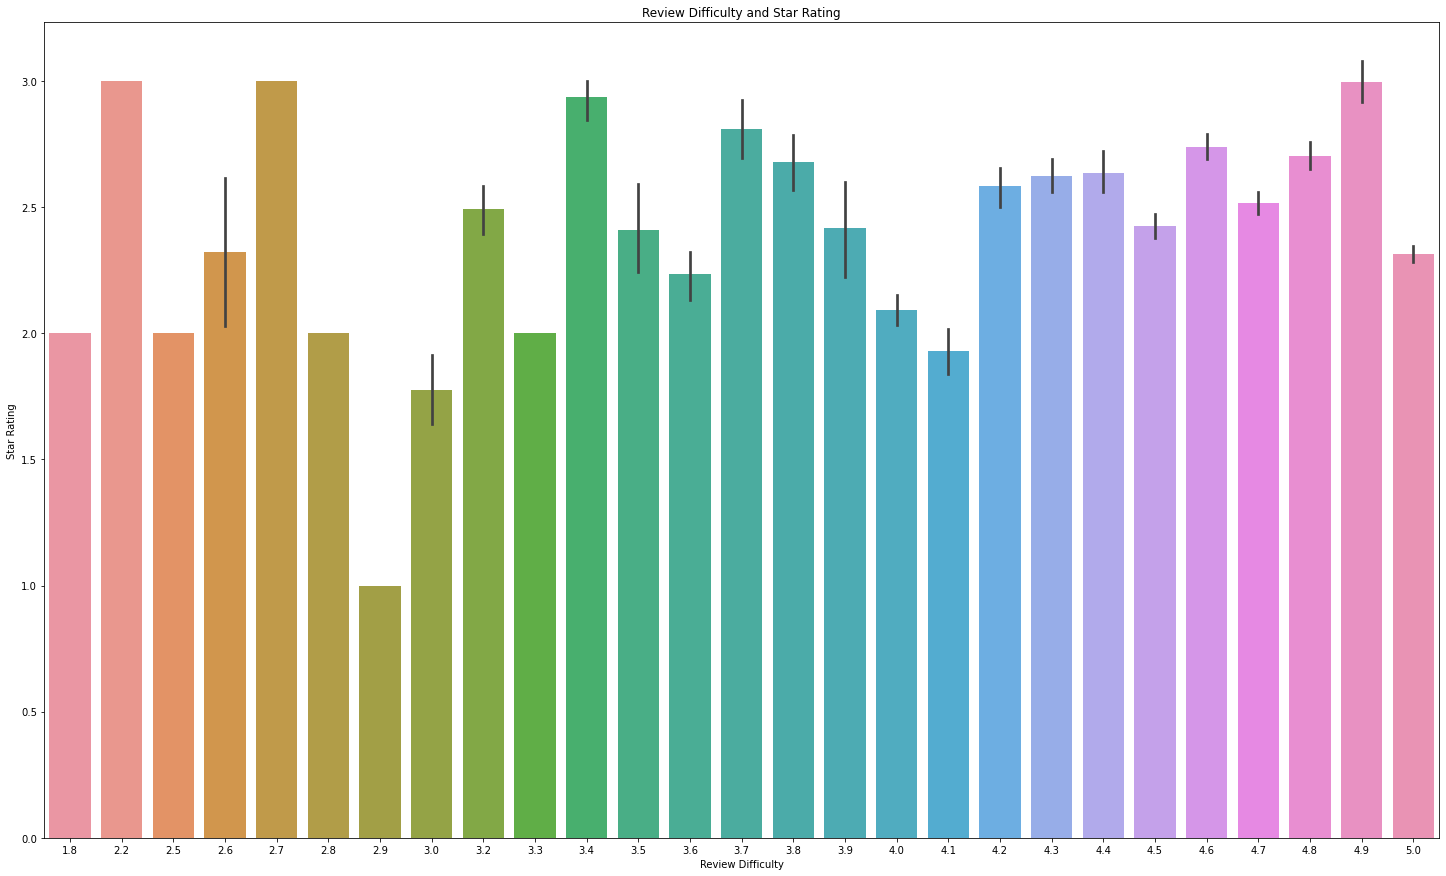

In [21]:
plt.figure(figsize=(25,15))
sns.barplot(y=legos['review_difficulty'], x=legos['star_rating'])
plt.ylabel('Star Rating')
plt.xlabel('Review Difficulty')
plt.title('Review Difficulty and Star Rating')


In [22]:
legos['review_difficulty'].value_counts()

2    4195
3    3765
1    1139
4    1058
5       8
Name: review_difficulty, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

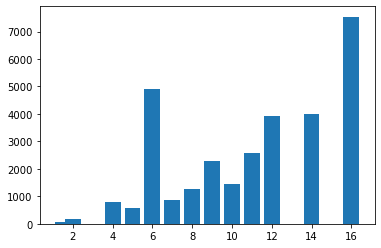

In [23]:
plt.bar(legos['min_age'], legos['piece_count'])
plt.show

In [25]:
legos_subset= legos[['list_price', 'piece_count', 'num_reviews',
                     'review_difficulty', 'star_rating', 'country_num', 'min_age']]
legos_subset.dtypes

list_price           float64
piece_count          float64
num_reviews          float64
review_difficulty      int64
star_rating          float64
country_num            int64
min_age              float64
dtype: object

In [26]:
legos_subset.describe()

,list_price,piece_count,num_reviews,review_difficulty,star_rating,country_num,min_age
count,10165.000000,10165.000000,10165.000000,10165.000000,10165.000000,10165.000000,10165.000000
mean,71.430894,561.123955,17.552681,2.468864,4.504466,10.584850,7.483965
std,99.054339,885.118073,37.051847,0.828304,0.521850,6.150305,2.980429
min,2.272400,1.000000,1.000000,1.000000,1.800000,1.000000,1.500000
25%,20.986000,116.000000,3.000000,2.000000,4.300000,5.000000,6.000000
50%,37.807800,257.000000,6.000000,2.000000,4.600000,10.000000,7.000000
75%,79.990000,603.000000,14.000000,3.000000,4.900000,16.000000,9.000000
max,1104.870000,7541.000000,367.000000,5.000000,5.000000,21.000000,16.000000


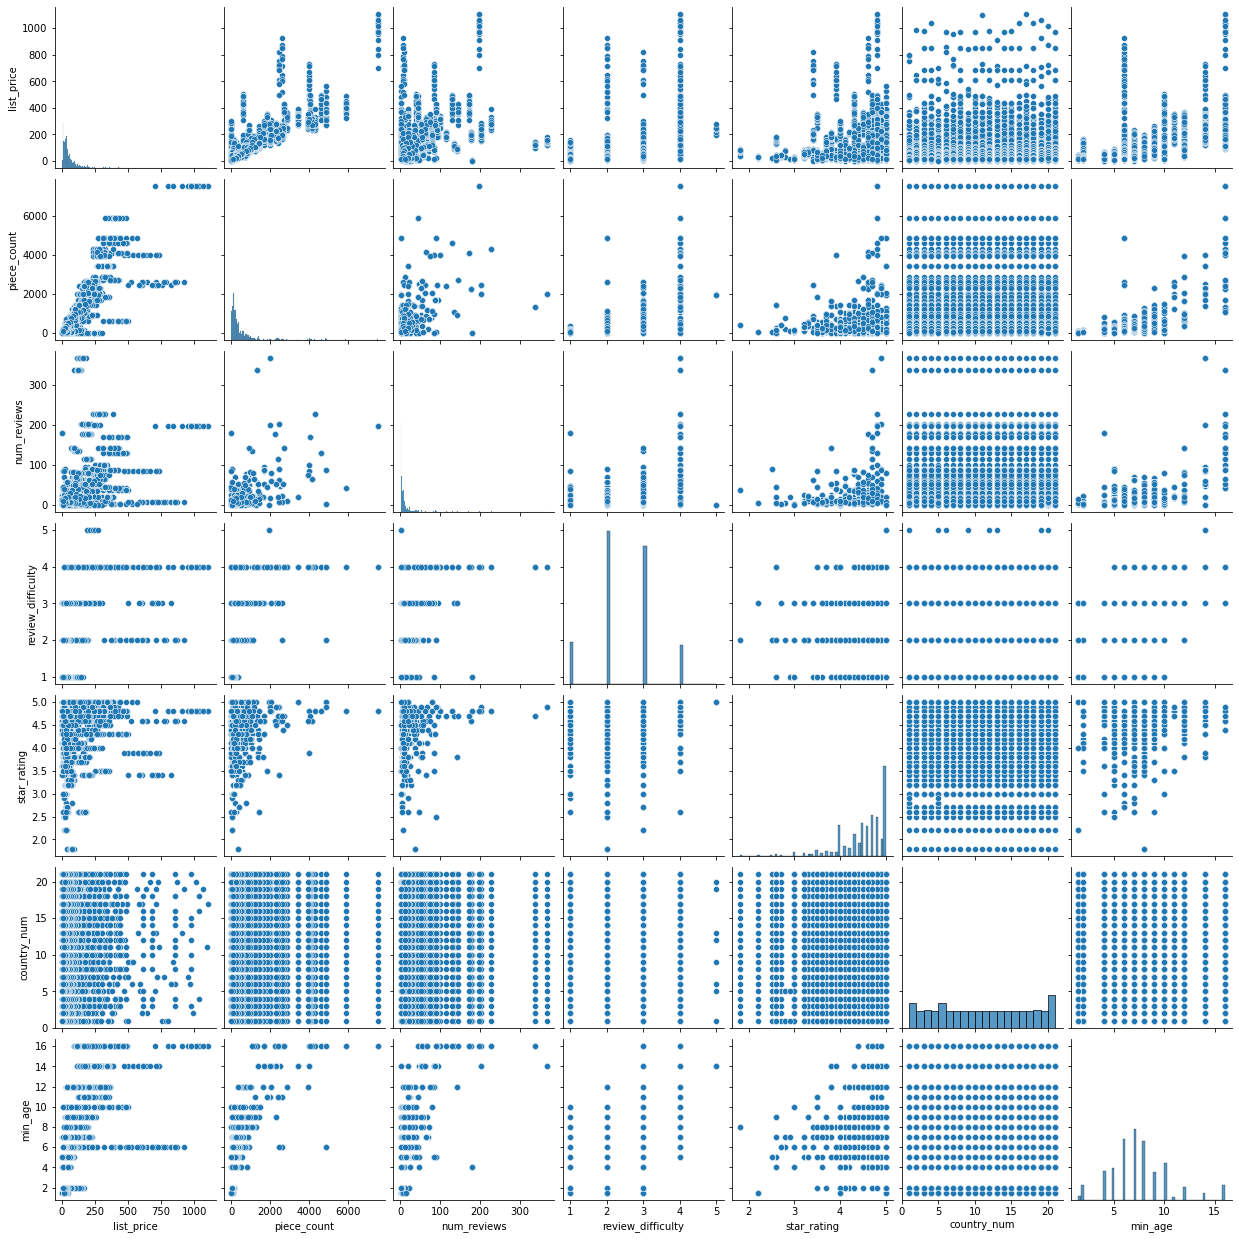

In [27]:
sns.pairplot(legos_subset)

Text(0.5, 1.0, 'Lego Set Rating Distribution')

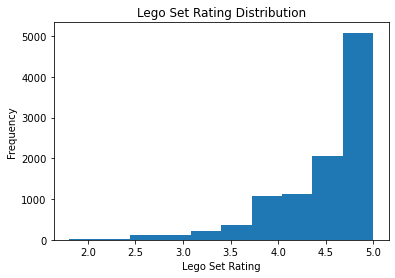

In [28]:
plt.hist(legos_subset['star_rating'])
plt.xlabel('Lego Set Rating')
plt.ylabel('Frequency')
plt.title('Lego Set Rating Distribution')

In [29]:
ratings= legos_subset.groupby(['star_rating'])

# EDA

In [30]:
legos_country= legos.groupby('country').mean()
legos_country= legos_country.reset_index()
legos_country.head()

,country,list_price,num_reviews,piece_count,play_star_rating,prod_id,review_difficulty,star_rating,val_star_rating,min_age,country_num
0,AT,70.564928,17.568134,560.840671,4.332914,66212.318658,2.471698,4.503145,4.211530,7.476939,3.0
1,AU,68.505514,17.650424,565.972458,4.334746,66022.199153,2.472458,4.506568,4.223517,7.479873,2.0
2,BE,75.883507,17.753191,567.893617,4.334043,66075.791489,2.472340,4.507234,4.217234,7.486170,4.0
3,CA,48.585362,15.153846,471.097242,4.314224,62760.465893,2.388970,4.500581,4.238462,7.370827,5.0
4,CH,70.977561,17.594937,566.926160,4.331857,66225.805907,2.478903,4.504219,4.220886,7.496835,6.0


In [31]:
fig= px.scatter(legos_country, x='list_price', y='piece_count', color= 'country',
           labels= {'piece_count':'No of pieces', 
                    'list_price':'Price in USD'}, title='Average Number of pieces and set price in USD by Country')
fig.update_traces(marker={'size': 15})
fig.show()

Text(0.5, 0, 'Country')

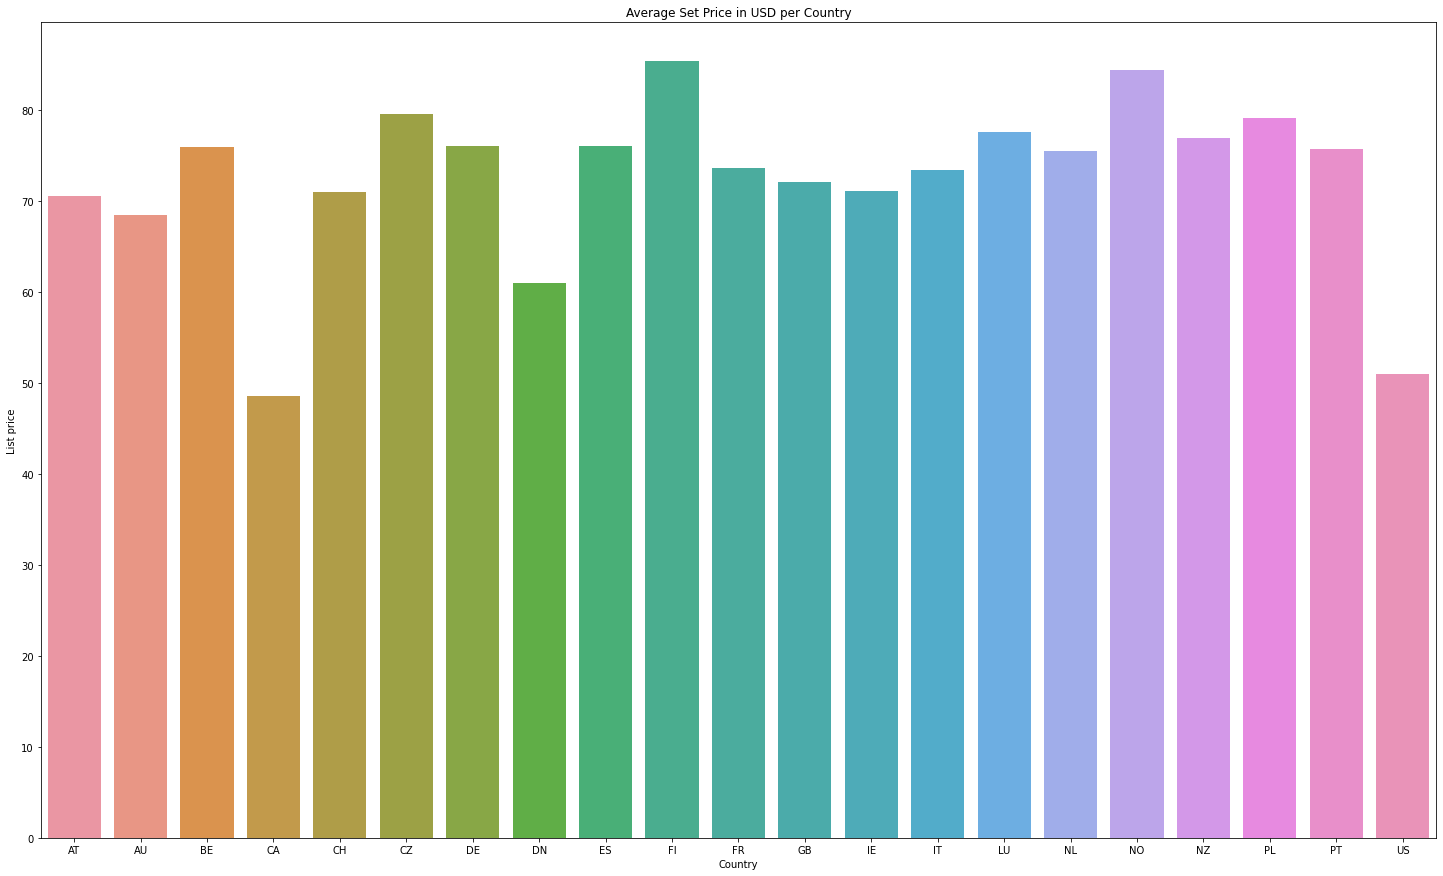

In [32]:
plt.figure(figsize=(25,15))
sns.barplot(x=legos_country['country'], y=legos_country['list_price'])
plt.title('Average Set Price in USD per Country')
plt.ylabel('List price')
plt.xlabel('Country')

In [34]:
legos_subset.cov()

,list_price,piece_count,num_reviews,review_difficulty,star_rating,country_num,min_age
list_price,9811.762062,76055.538082,1642.741590,41.170129,0.404270,35.554617,151.443751
piece_count,76055.538082,783434.002343,17855.992682,405.578338,37.987089,129.149950,1732.219324
num_reviews,1642.741590,17855.992682,1372.839339,10.145309,0.297817,3.498653,59.613202
review_difficulty,41.170129,405.578338,10.145309,0.686088,0.031101,0.116451,1.231447
star_rating,0.404270,37.987089,0.297817,0.031101,0.272328,0.005957,0.088811
country_num,35.554617,129.149950,3.498653,0.116451,0.005957,37.826256,0.169848
min_age,151.443751,1732.219324,59.613202,1.231447,0.088811,0.169848,8.882958


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'list_price'),
  Text(0, 1.5, 'piece_count'),
  Text(0, 2.5, 'num_reviews'),
  Text(0, 3.5, 'review_difficulty'),
  Text(0, 4.5, 'star_rating'),
  Text(0, 5.5, 'country_num'),
  Text(0, 6.5, 'min_age')])

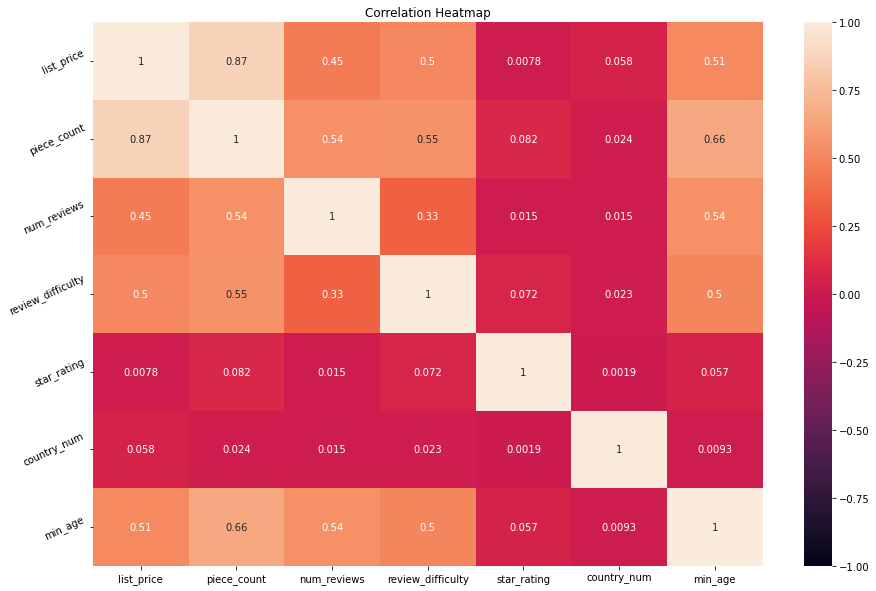

In [35]:
legos_subset.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(legos_subset.corr(), annot=True, vmax=1, vmin=-1)
plt.title('Correlation Heatmap')
plt.yticks(rotation=25)

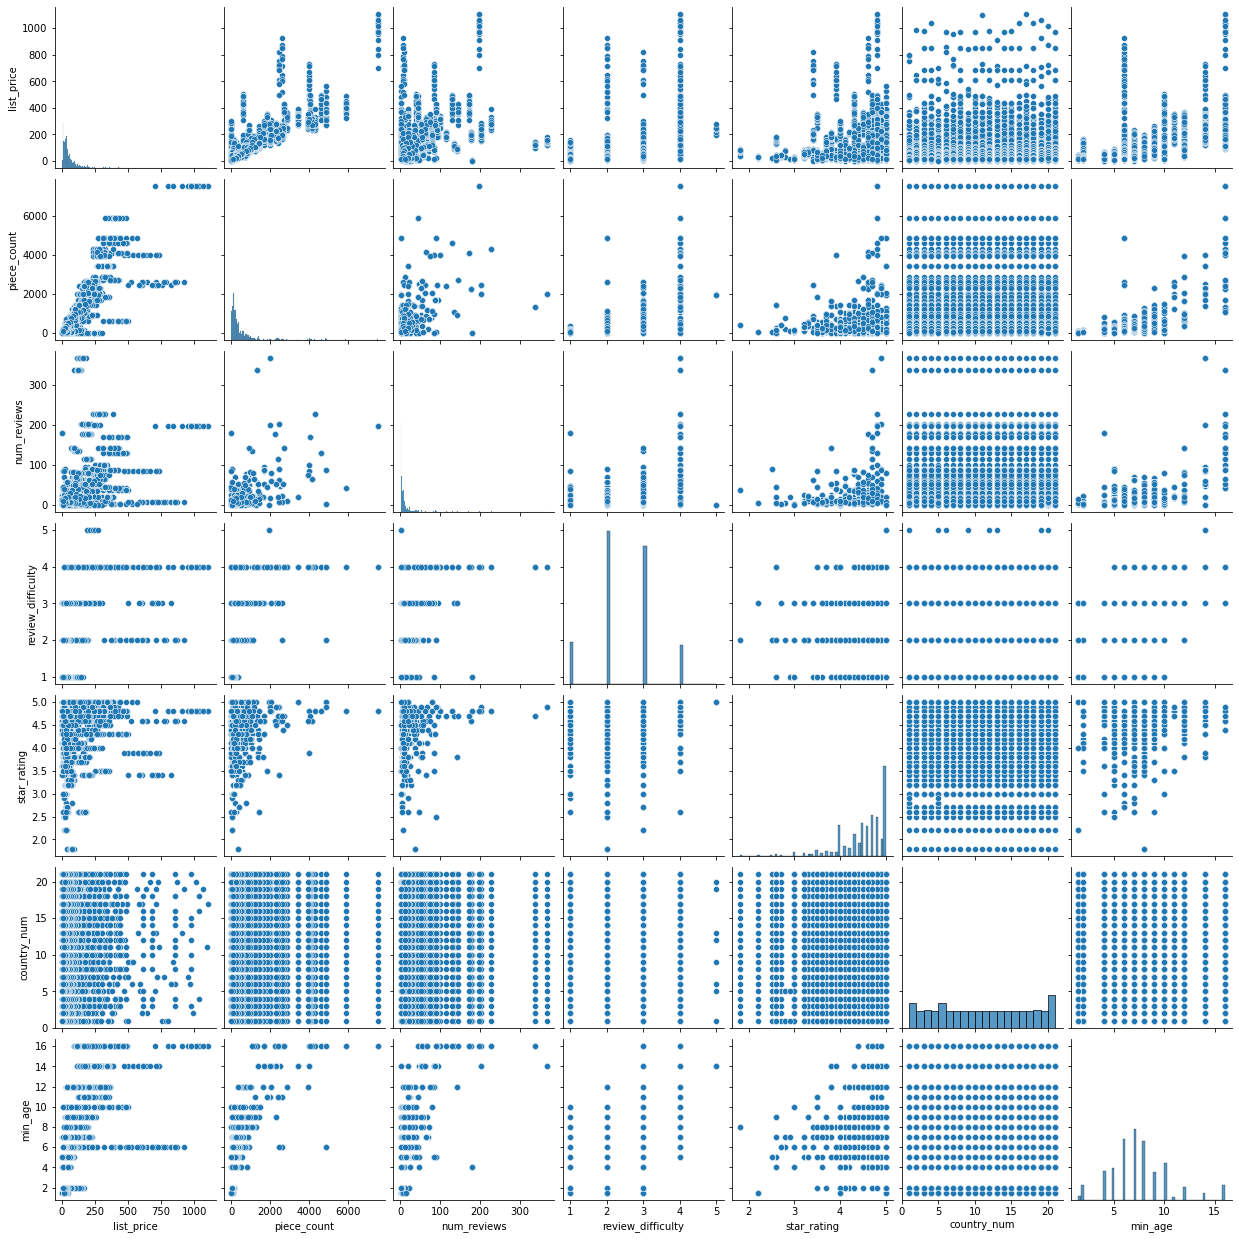

In [36]:
sns.pairplot(legos_subset)

# Linear regression

In [37]:
selector= VarianceThreshold()
lego_subset_clean= selector.fit_transform(legos_subset)
print(lego_subset_clean.shape)
lego_subset_clean=pd.DataFrame(lego_subset_clean)

(10165, 7)


                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     3629.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:41:39   Log-Likelihood:                -23972.
No. Observations:               10165   AIC:                         4.795e+04
Df Residuals:                   10163   BIC:                         4.796e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3814      0.031    203.962      0.0

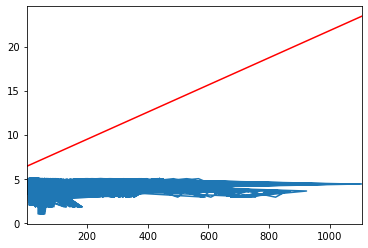

2.5585308572008656


In [38]:
X= pd.DataFrame(lego_subset_clean.iloc[:,0])
X= sm.add_constant(X)
y= pd.DataFrame(lego_subset_clean.iloc[:,6])

np.random.seed(1)
model= sm.OLS(y, X).fit()
print(model.summary())

temp_rad= sm.graphics.abline_plot(model_results= model, color='red')
ax= temp_rad.axes[0]
plt.plot(legos['list_price'], legos['val_star_rating'])
plt.show()

print(np.sqrt(model.scale))

Text(0, 0.5, 'Residuals')

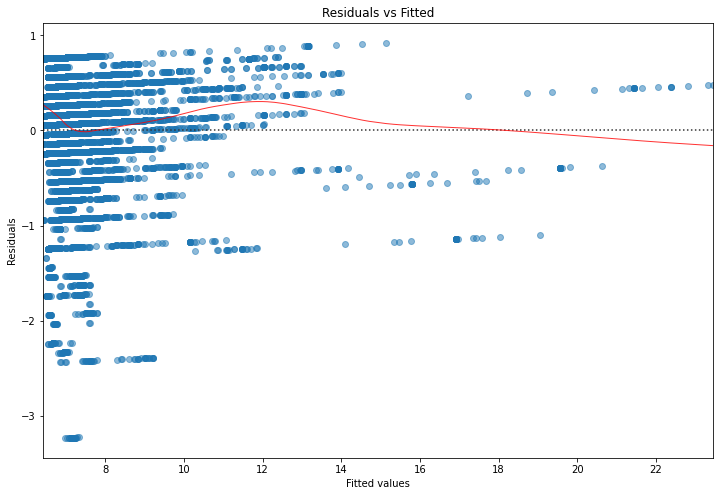

In [40]:
fitted= model.fittedvalues
residuals= model.resid

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = sns.residplot(fitted, legos['val_star_rating'], 
                    data=legos_subset, 
                    lowess = True, 
                    scatter_kws = {'alpha': 0.5}, 
                    line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

C:\Users\625737\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



Text(0, 0.5, 'Standardized Residuals')

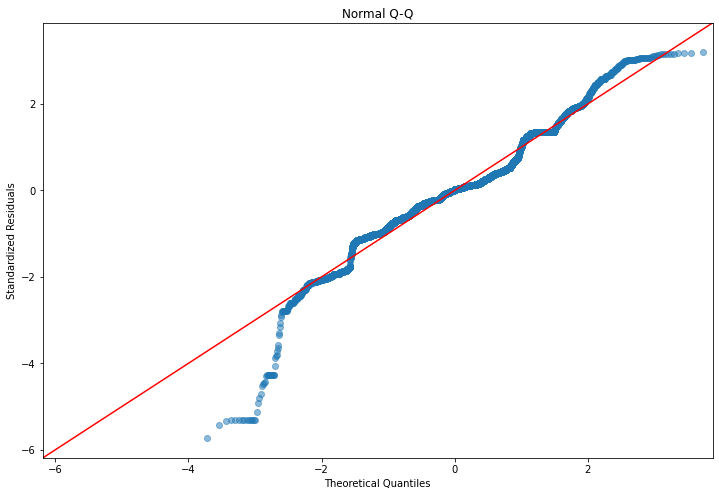

In [41]:
model_norm_residuals = model.get_influence().resid_studentized_internal
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line= '45', alpha = 0.5, color = '#4C72B0', lw = 1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

C:\Users\625737\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'sqrt(|Standardized Residuals|)')

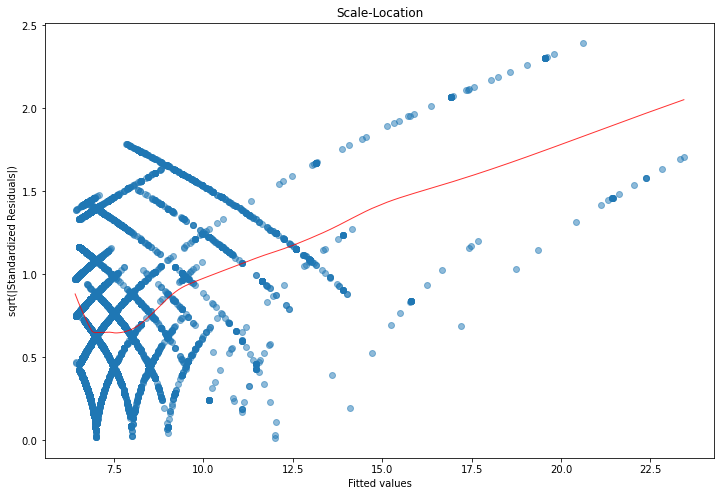

In [42]:
#check for equal variance

model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(fitted, model_norm_residuals_abs_sqrt, alpha = 0.5)
sns.regplot(fitted, model_norm_residuals_abs_sqrt,
            scatter = False, 
            ci = False, 
            lowess = True,
            line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('sqrt(|Standardized Residuals|)')

# Multiple Linear Regression

In [43]:
selector= VarianceThreshold()
lego_subset_clean= selector.fit_transform(legos_subset)
print(lego_subset_clean.shape)
lego_subset_clean=pd.DataFrame(lego_subset_clean)

(10165, 7)


In [44]:
X= legos_subset[['list_price', 'piece_count', 'num_reviews', 'review_difficulty', 'country_num']]
X = sm.add_constant(X)
y = pd.DataFrame(legos_subset.iloc[:,6])

np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model_m = sm.OLS(y_train, X_train).fit()
print(model_m.summary())

(7115, 6) (7115, 1)
(3050, 6) (3050, 1)
                            OLS Regression Results                            
Dep. Variable:                min_age   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     1498.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:42:26   Log-Likelihood:                -15285.
No. Observations:                7115   AIC:                         3.058e+04
Df Residuals:                    7109   BIC:                         3.062e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

7687     6.396657
2917     7.197136
3779     6.696254
1192     7.152629
10612    6.716430
dtype: float64
7687     0.603343
2917    -1.197136
3779     0.303746
1192     0.847371
10612    0.283570
dtype: float64


C:\Users\625737\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Residuals')

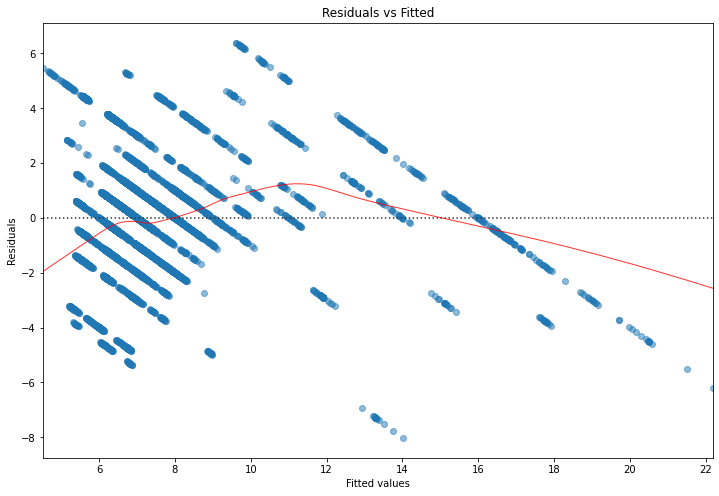

In [45]:
fitted_m = model_m.fittedvalues
print(fitted_m.head())
residuals_m = model_m.resid
print(residuals_m.head())

# Get the normalized residuals.
model_m_norm_residuals = model_m.get_influence().resid_studentized_internal
# Get the absolute squared normalized residuals.
model_m_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_m_norm_residuals))
# Get the absolute residuals. 
model_m_abs_resid = np.abs(residuals_m)
# Combine X_train and y_train into one dataframe for plotting.
frames = [X_train, y_train]
training = pd.concat(frames, axis = 1) # axis = 1 allows us to combine by columns

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = sns.residplot(fitted_m, y_train, data = training, 
                          lowess = True, 
                          scatter_kws = {'alpha': 0.5}, 
                          line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

C:\Users\625737\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



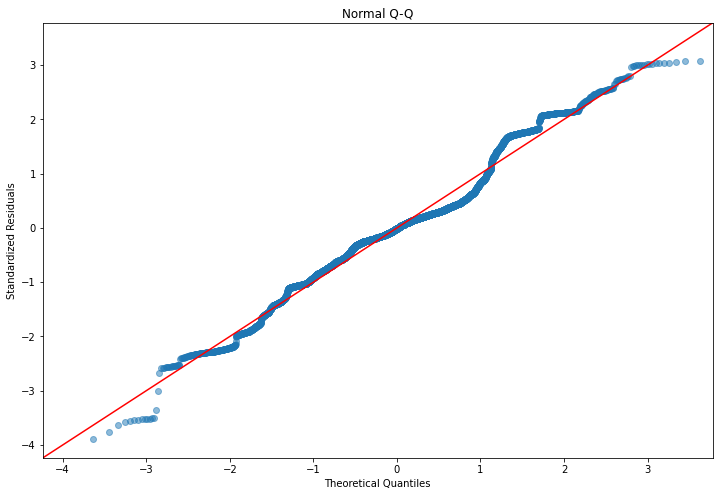

In [46]:
QQ = ProbPlot(model_m_norm_residuals)
plot_lm_2 = QQ.qqplot(line = '45', alpha = 0.5, color = '#4C72B0', lw = 1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

C:\Users\625737\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

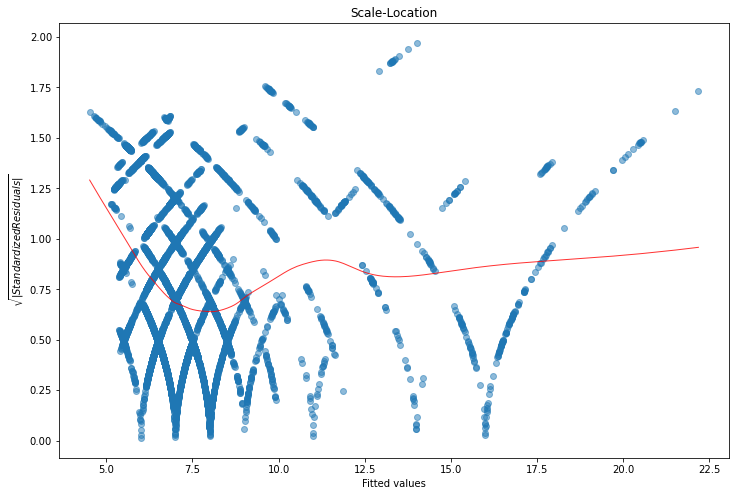

In [47]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(fitted_m, model_m_norm_residuals_abs_sqrt, alpha = 0.5)
sns.regplot(fitted_m, model_m_norm_residuals_abs_sqrt, 
            scatter = False, 
            ci = False, 
            lowess = True,
            line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')


In [48]:
test_m = model_m.outlier_test()
print("Bad data points (bonf(p) < 0.05):\n", test_m[test_m['bonf(p)'] < 0.05])
test_final_m = test_m[test_m['bonf(p)'] < 0.05]

test_final_m = test_m[test_m['bonf(p)'] < 0.05]
X_train_no_outliers = X_train.drop(test_final_m.index)
y_train_no_outliers = y_train.drop(test_final_m.index)
print(X_train_no_outliers.shape)
print(y_train_no_outliers.shape)

Bad data points (bonf(p) < 0.05):
 Empty DataFrame
Columns: [student_resid, unadj_p, bonf(p)]
Index: []
(7115, 6)
(7115, 1)


In [49]:
model_m_no_outliers = sm.OLS(y_train_no_outliers, X_train_no_outliers).fit()
model_m_no_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                min_age   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     1498.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:49:43   Log-Likelihood:                -15285.
No. Observations:                7115   AIC:                         3.058e+04
Df Residuals:                    7109   BIC:                         3.062e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6219      0.092     50.036      0.000       4.441       4.803
list_price           -0.0064      0.000    -12.868      0.000      -0.007      -0.005
piece_count           0.0020   6.15e-05     32.994      0.000       0.002       0.002
num_reviews           0.0196      0.001     24.395      0.000       0.018       0.021
review_difficulty     0.7035      0.036     19.740      0.000       0.634       0.773
country_num           0.0072      0.004      1.805      0.071      -0.001       0.015
==============================================================================
Omnibus:                       83.814   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.144
Skew:                           0.147   Prob(JB):                     2.22e-26
Kurtosis:                       3.559   Cond. No.                     4.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
fitted_m_no_outliers = model_m_no_outliers.fittedvalues
print(fitted_m_no_outliers.head())

residuals_m_no_outliers = model_m_no_outliers.resid
print(residuals_m_no_outliers.head())

7687     6.396657
2917     7.197136
3779     6.696254
1192     7.152629
10612    6.716430
dtype: float64
7687     0.603343
2917    -1.197136
3779     0.303746
1192     0.847371
10612    0.283570
dtype: float64


In [51]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_no_outliers.values, i) for i in range(X_train_no_outliers.shape[1])]
vif["features"] = X_train_no_outliers.columns
print(vif)

if vif[vif['VIF Factor'] > 10].features.shape[0] > 0:
    print("Multicollinearity exists in our model")
else:
    print("No multicollinearity exists in our model")

   VIF Factor           features
0   14.105504              const
1    3.995303         list_price
2    4.822066        piece_count
3    1.436294        num_reviews
4    1.439537  review_difficulty
5    1.005743        country_num
Multicollinearity exists in our model


In [52]:
prediction = model_m_no_outliers.predict(X_test)
print(prediction.head())

9587     7.004165
5323     6.196204
8996     6.746816
10904    6.950611
1243     7.766241
dtype: float64


In [54]:

legos_subset.to_csv('LEGO_subset1.csv')